## 1유형 연습문제  
출처  https://www.kaggle.com/datasets/agileteam/bigdatacertificationkr

데이터셋(basic1.csv)의 'f5' 컬럼을 기준으로 상위 10개의 데이터를 구하고,  
'f5'컬럼 10개 중 최소값으로 데이터를 대체한 후,  
'age'컬럼에서 80 이상인 데이터의'f5 컬럼 평균값 구하기

In [1]:
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv('/Users/greedy/Downloads/basic1.csv')

In [39]:
data.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [40]:
data2 = data.sort_values('f5', ascending = False)

In [41]:
min = data2.iloc[:10]['f5'].min()

In [42]:
data2.iloc[:10]['f5'] = min

/var/folders/3c/6rc19g3n3p9ctq6gjs0d2c_40000gn/T/ipykernel_82804/2035240062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.iloc[:10]['f5'] = min


In [43]:
data2[data2['age']>80]['f5'].mean()

61.993717579999995

문제2  
데이터셋(basic1.csv)의 앞에서 순서대로 70% 데이터만 활용해서,  
'f1'컬럼 결측치를 중앙값으로 채우기 전후의 표준편차를 구하고  
두 표준편차 차이 계산하기

In [45]:
len(data) * 0.7

70.0

In [74]:
#data3 = data.iloc[:70, :]
data70, data30 = np.split(data, [int(0.7*len(data))])

In [75]:
data70

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
65,id66,87.0,경기,NaN,1,NaN,ISFP,17.252986
66,id67,66.0,경기,52.0,1,NaN,ISFJ,73.586397
67,id68,35.0,경기,45.0,2,NaN,ISFP,67.886373
68,id69,75.0,경기,85.0,0,NaN,ESTJ,69.730313


In [76]:
std1 = data70['f1'].std()
std1

17.98727579865276

In [77]:
data70['f1'].median()

68.0

In [80]:
data70['f1'].fillna(data70['f1'].median(), inplace=True)

In [83]:
std2 = data70['f1'].std()

In [84]:
std1-std2

3.2965018033960725

문제3  
데이터셋(basic1.csv)의 'age'컬럼의 이상치를 더하시오!\
단, 평균으로부터 '표준편차*1.5'를 벗어나는 영역을 이상치라고 판단함

In [90]:
data['age'].describe()

count    100.000000
mean      50.963000
std       30.442759
min      -13.500000
25%       26.875000
50%       52.500000
75%       77.000000
max      100.000000
Name: age, dtype: float64

In [91]:
er = data['age'].std()*1.5

In [95]:
mean = data['age'].mean()
mean

50.963

In [96]:
m1 = mean-er
m2 = mean+er

In [97]:
print(m1, m2)

5.298862216116952 96.62713778388306


In [100]:
data[(data['age'] > m2) | (data['age'] < m1)]['age'].sum()

473.5

이상치를 찾아라  
데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오

In [101]:
data = pd.read_csv('/Users/greedy/Downloads/빅분기/titanic/train.csv')

In [102]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [106]:
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)
iqr = q3-q1

In [107]:
iqr

23.0896

In [111]:
min = q1-(1.5*iqr)
max = q3+(1.5*iqr)
print(min, max)

-26.724 65.6344


In [118]:
over = data[(data['Fare']<min) | (data['Fare'] > max)]['Sex']

In [126]:
over

1      female
27       male
31     female
34       male
52     female
        ...  
846      male
849    female
856    female
863    female
879    female
Name: Sex, Length: 116, dtype: object

In [127]:
(over=='female').sum()

70

이상치를 찾아라(소수점 나이)  
주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오

In [129]:
data = pd.read_csv('/Users/greedy/Downloads/빅분기/basic1.csv')

In [130]:
data.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [153]:
data[(data['age'] - np.floor(data['age'])) != 0]

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [138]:
ceil = np.ceil(data['age'])
floor = np.floor(data['age'])
trunc = np.trunc(data['age'])

In [142]:
print(ceil.mean(), floor.mean(), trunc.mean())

51.0 50.92 50.94


In [154]:
print(ceil.mean() + floor.mean() + trunc.mean())

152.86


결측치 처리  
주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고,  
80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [159]:
len(data) * 0.8

80.0

In [163]:
for i in data.columns:
    if data[i].isnull().sum() > len(data) * 0.8:
        print(i)

f3


In [164]:
data2 = data.drop(columns = ['f3'])

In [170]:
data2.groupby('city').median()['f1']

city
경기    58.0
대구    75.0
부산    62.0
서울    68.0
Name: f1, dtype: float64

In [180]:
s = 69
k = 58
b = 62
d = 75

In [185]:
data2['f1'] = data2['f1'].fillna(data['city'].map({'서울' : s, '경기' : k, '부산' : b, '대구' : d}))

In [186]:
data2

,id,age,city,f1,f2,f4,f5
0,id01,2.0,서울,69.0,0,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,ISTJ,17.252986
3,id04,75.0,서울,69.0,2,INFP,52.667078
4,id05,24.0,서울,85.0,2,ISFJ,29.269869
...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,ENTJ,52.667078
96,id97,100.0,경기,58.0,0,INFP,67.886373
97,id98,39.0,경기,58.0,2,INFP,98.429899
98,id99,1.0,경기,47.0,0,ESFJ,97.381034


In [187]:
data2['f1'].mean()

65.57

왜도와 첨도 구하기  
주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과,  
'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오

In [190]:
data = pd.read_csv('/Users/greedy/Downloads/빅분기/train.csv')

In [191]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
s1 = data['SalePrice'].skew()

In [202]:
k1 = data['SalePrice'].kurt()

<AxesSubplot:>

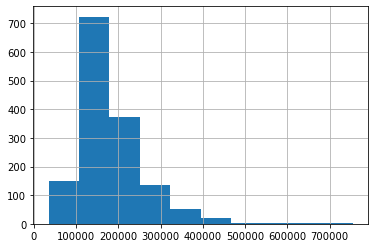

In [197]:
data['SalePrice'].hist()

In [198]:
np.log1p(data['SalePrice'])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [203]:
s2 = np.log1p(data['SalePrice']).skew()

In [204]:
k2 = np.log1p(data['SalePrice']).kurt()

In [207]:
print(round(s1 + k1 + s2 + k2, 2))

9.35


조건에 맞는 데이터 표준편차 구하기  
주어진 데이터 중 basic1.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오


In [208]:
data = pd.read_csv('/Users/greedy/Downloads/빅분기/basic1.csv')

In [214]:
std1 = data[data['f4'] == 'ENFJ']['f1'].std()

In [215]:
std2 = data[data['f4'] == 'INFP']['f1'].std()

In [217]:
abs(std1 - std2)

5.859621525876811

결측치 제거 및 그룹 합계에서 조건에 맞는 값 찾아 출력  
주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고,  
'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오

In [219]:
data['f1'].isnull().sum()

31

In [224]:
data2 = data

In [240]:
data2

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [244]:
data2[data2['f1'].isnull()].index

Int64Index([ 0,  3, 11, 16, 18, 20, 24, 29, 33, 34, 36, 37, 43, 45, 47, 50, 53,
            55, 58, 59, 61, 64, 65, 72, 78, 81, 85, 86, 89, 93, 96],
           dtype='int64')

In [247]:
data2 = data2.drop(data2[data2['f1'].isnull()].index)

In [248]:
data2

,id,age,city,f1,f2,f3,f4,f5
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [249]:
data2.groupby(['city', 'f2']).sum()

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [250]:
data2[(data2['city'] == '경기') & (data2['f2'] == 0)]['f1']

68    85.0
71    97.0
73    98.0
74    47.0
75    12.0
76    31.0
79    60.0
83    44.0
84    55.0
87    75.0
90    72.0
92    57.0
98    47.0
99    53.0
Name: f1, dtype: float64

'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고,  
'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!



In [252]:
data[data['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [255]:
data2 = data
data2['f4'] = data['f4'].replace('ESFJ', 'ISFJ')

In [257]:
data2[(data2['city'] == '경기') & (data2['f4'] == 'ISFJ')]['age'].max()

90.0

주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다.  
이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고,  
누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)

In [265]:
data2 = data
data2[data2['f2']==1]['f1'].cumsum()

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16       NaN
19     534.0
20       NaN
21     606.0
22     681.0
25     738.0
27     772.0
33       NaN
35     849.0
37       NaN
46     924.0
49    1002.0
51    1084.0
53       NaN
55       NaN
58       NaN
62    1170.0
65       NaN
66    1222.0
69    1318.0
72       NaN
77    1414.0
80    1464.0
82    1514.0
86       NaN
88    1580.0
91    1658.0
93       NaN
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [267]:
data2[data2['f2']==1]['f1'].fillna(method = 'bfill').cumsum().mean()

1315.2702702702702

수치형 변수 변환하기  
주어진 데이터에서 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 그 중앙값을 구하시오

In [277]:
from sklearn.preprocessing import StandardScaler


In [278]:
scaler = StandardScaler()

In [282]:
data['f5'] = scaler.fit_transform(data[['f5']])

In [284]:
data['f5'].median()

0.260619629559015

수치형 변수 변환하기  
주어진 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후,  
f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 
두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오

In [302]:
data = pd.read_csv('/Users/greedy/Downloads/빅분기/basic1.csv')

In [303]:
from sklearn.preprocessing import power_transform

In [304]:
data2 = data[data['age'] >= 20]

In [315]:
mode = data2['f1'].mode()[0]

In [317]:
data2['f1'] = data2['f1'].fillna(mode)

/var/folders/3c/6rc19g3n3p9ctq6gjs0d2c_40000gn/T/ipykernel_82804/1090491273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['f1'] = data2['f1'].fillna(mode)


In [327]:
data2['y'] = power_transform(data2[['f1']])
data2['y'].head()

/var/folders/3c/6rc19g3n3p9ctq6gjs0d2c_40000gn/T/ipykernel_82804/84293521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['y'] = power_transform(data2[['f1']])


2    0.101083
3   -0.585402
4    1.463459
5   -0.143094
6    0.040578
Name: y, dtype: float64

In [330]:
data2['y'] = power_transform(data2[['f1']], standardize = False)
data2['y'].head()

/var/folders/3c/6rc19g3n3p9ctq6gjs0d2c_40000gn/T/ipykernel_82804/3571601598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['y'] = power_transform(data2[['f1']], standardize = False)


2    20.583423
3    17.968081
4    25.773745
5    19.653167
6    20.352915
Name: y, dtype: float64

In [332]:
data2['y'] = power_transform(data2[['f1']],method = 'box-cox', standardize = False)
data2['y'].head()

/var/folders/3c/6rc19g3n3p9ctq6gjs0d2c_40000gn/T/ipykernel_82804/3173478913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['y'] = power_transform(data2[['f1']],method = 'box-cox', standardize = False)


2    21.067090
3    18.305263
4    26.557680
5    20.084373
6    20.823545
Name: y, dtype: float64

min-max스케일링 기준 상하위 5% 구하기  
주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 상위 5%와 하위 5% 값의 합을 구하시오

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/greedy/Downloads/빅분기/basic1.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()

In [9]:
df['f5_1'] = scaler.fit_transform(df[['f5']])

In [24]:
lower = df['f5'].quantile(0.05)
upper = df['f5'].quantile(0.95)

lower+upper

110.43095548

city와 f4를 기준으로 f5의 평균값을 구한 다음, f5를 기준으로 상위 7개 값을 모두 더해 출력하시오 (소수점 둘째자리까지 출력)

In [26]:
df = pd.read_csv('/Users/greedy/Downloads/빅분기/basic1.csv')

In [38]:
round(df.groupby(['city', 'f4'])['f5'].mean().sort_values(ascending = False).head(7).sum(),2)

643.68

주어진 데이터 셋에서 age컬럼 상위 20개의 데이터를 구한 다음   
f1의 결측치를 중앙값으로 채운다.  
그리고 f4가 ISFJ와 f5가 20 이상인   
f1의 평균값을 출력하시오!  

In [39]:
df = pd.read_csv('/Users/greedy/Downloads/빅분기/basic1.csv')

In [55]:
df2 = df.sort_values(['age'], ascending = False).head(20)
df2

,id,age,city,f1,f2,f3,f4,f5
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
36,id37,100.0,부산,NaN,0,NaN,ESTP,33.308999
44,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
51,id52,97.0,대구,82.0,1,NaN,ISFJ,90.496999
91,id92,97.0,경기,78.0,1,NaN,INFP,97.381034
9,id10,95.0,서울,74.0,1,NaN,ISFP,98.429899
45,id46,93.0,대구,NaN,0,NaN,ESTJ,67.886373
77,id78,92.0,경기,96.0,1,NaN,INTJ,69.730313
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
72,id73,90.0,경기,NaN,1,NaN,ISFJ,73.586397


In [49]:
med = df2['f1'].median()

In [62]:
df2['f1'] = df2['f1'].fillna(med)

In [63]:
df2[(df2['f4'] == 'ISFJ') & (df2['f5'] >= 20)]['f1'].mean()

73.875

주어진 데이터 셋에서 f2가 0값인 데이터를 age를 기준으로 오름차순 정렬하고  
앞에서 부터 20개의 데이터를 추출한 후   
f1 결측치(최소값)를 채우기 전과 후의 분산 차이를 계산하시오 (소수점 둘째 자리까지)  

In [64]:
df = pd.read_csv('/Users/greedy/Downloads/빅분기/basic1.csv')

In [65]:
df.head(3)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986


In [71]:
df2 = df[df['f2'] ==0].sort_values('age').head(20)

In [81]:
a = df2['f1'].var()
b = df2['f1'].fillna(df2['f1'].min()).var()

In [83]:
round(a-b,2)

38.44

In [77]:
b = df2['f1'].fillna(df2['f1'].min()).std()

17.701025840031807

2022년 5월 sales의 중앙값을 구하시오



In [85]:
df = pd.read_csv('/Users/greedy/Downloads/빅분기/basic2.csv')

In [86]:
df.head(3)

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1


In [90]:
df['Date'] = pd.to_datetime(df['Date'])

In [115]:
df2 = df[df['Date'].dt.year==2022]

In [122]:
df2[df2['Date'].dt.month == 5]['Sales'].median()

1477685.0

## 2유형

In [ ]:
백화점 고객의 1년 간 구매 데이터를 활용해

데이터 전처리
Feature Engineering
모델링 (분류 알고리즘 사용)
하이퍼파라미터 튜닝 (초매개변수 최적화)
모형 앙상블
csv제출
유의사항

수험번호.csv 파일이 만들어지도록 코드를 제출함
제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점함
